In [4]:
import pandas as pd
import numpy as np
from ngboost import NGBRegressor

df = pd.read_csv(r"D:\NATPAC\Datasets\combined.csv")
df.drop(df.columns[0], axis=1, inplace=True)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

model_ngb = NGBRegressor(n_estimators=2000)
model_ngb.fit(X, y)

forecast_2023_ngb = model_ngb.predict(X)

print(forecast_2023_ngb)

[iter 0] loss=15.0016 val_loss=0.0000 scale=1.0000 norm=534824.1412
[iter 100] loss=14.8281 val_loss=0.0000 scale=2.0000 norm=1026339.0260
[iter 200] loss=14.7425 val_loss=0.0000 scale=2.0000 norm=984001.6731
[iter 300] loss=14.6617 val_loss=0.0000 scale=1.0000 norm=471044.6244
[iter 400] loss=14.5932 val_loss=0.0000 scale=2.0000 norm=905746.4602
[iter 500] loss=14.5214 val_loss=0.0000 scale=1.0000 norm=437796.3110
[iter 600] loss=14.4588 val_loss=0.0000 scale=0.5000 norm=210554.7318
[iter 700] loss=14.4140 val_loss=0.0000 scale=0.5000 norm=203994.1794
[iter 800] loss=14.3721 val_loss=0.0000 scale=1.0000 norm=396438.6806
[iter 900] loss=14.3292 val_loss=0.0000 scale=1.0000 norm=384960.6719
[iter 1000] loss=14.2845 val_loss=0.0000 scale=0.5000 norm=186732.1174
[iter 1100] loss=14.2418 val_loss=0.0000 scale=0.5000 norm=181439.9358
[iter 1200] loss=14.2104 val_loss=0.0000 scale=1.0000 norm=355180.1827
[iter 1300] loss=14.1862 val_loss=0.0000 scale=0.0625 norm=21818.3903
[iter 1400] loss=1

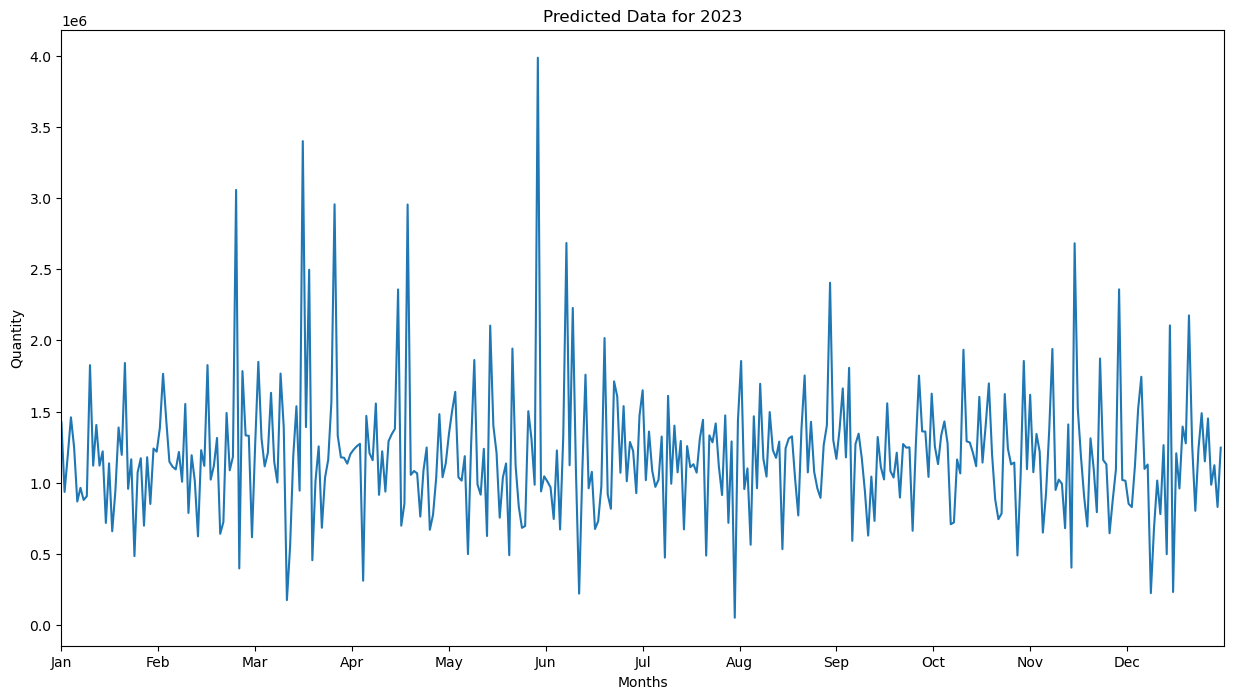

In [5]:
import matplotlib.pyplot as plt
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_ticks = np.arange(0, 366, 30.5)
days = range(366)
plt.figure(figsize=(15, 8))
plt.plot(days, forecast_2023_ngb, marker='')
plt.xlabel('Months')
plt.ylabel('Quantity')
plt.title('Predicted Data for 2023')
plt.xticks(month_ticks, months)
plt.xlim(0, 366)
plt.show()

In [6]:
import pandas as pd

df2 = pd.read_csv(r"D:\NATPAC\Datasets\combined.csv")

new_df = pd.DataFrame(forecast_2023_ngb, columns=["2023"])

result_df = pd.concat([df2, new_df], axis=1)

result_df.to_csv(r"D:\NATPAC\Datasets\NGBoost\2023.csv", index=False)

print(result_df)

    Month_Day     2018     2019     2020     2021     2022          2023
0       01-01   337485   686993  1284272  1244317  1285112  1.425739e+06
1       01-02  1030556  1920106   985410  1499299   805926  9.357349e+05
2       01-03  1030556  1598395   985410  1115398  1198180  1.191723e+06
3       01-04   697207  1621244   110652   213313  2054215  1.459777e+06
4       01-05  1464201   148152   985410  1020265  1198180  1.248669e+06
..        ...      ...      ...      ...      ...      ...           ...
361     12-27   125924   643626   985410  2648166  1669346  1.451603e+06
362     12-28  2477337   995967  3430383  1001102  1113987  9.859712e+05
363     12-29  1030556   392141   985410   966369   278274  1.123267e+06
364     12-30  1030556  1054901   134188   178873   416466  8.302768e+05
365     12-31   903441  1088381   985410  1001102  1218553  1.246643e+06

[366 rows x 7 columns]
